# Results on the toy lattice models

This notebook contains the fruits of my attempts at reproducing the results presented in the the following papers:

* Bässler, Heinz. "Charge transport in disordered organic photoconductors. A Monte Carlo simulation study." Physica Status Solidi B (Basic Research);(Germany) 175.1 (1993).

* Yu, Z. G., et al. "Molecular geometry fluctuation model for the mobility of conjugated polymers." Physical Review Letters 84.4 (2000): 721.

* Yu, Z. G., et al. "Molecular geometry fluctuations and field-dependent mobility in conjugated polymers." Physical Review B 63.8 (2001): 085202.

The first paper describes the Gaussian disorder model (GDM), the two other papers describe the YSSMB model.

## 1. Results on 1D lattice, Gaussian disorder

I'm using the iterative solution of the master equation detailed the third paper mentioned above to get charge velocity vs temperature curves.
I'm running this on a 1D chain with $N = 1024$ sites and periodic boundary conditions. Only nearest- next-nearest-neighbour hopping are considered. All site energies are iid from $\mathcal{N}(0,\nu_{eff})$ with $\nu_{eff} = 0.007\,\text{eV}$. The results with 1 carrier are averaged over 500 realisations, those with 7 carriers were averaged over 300 realisations.

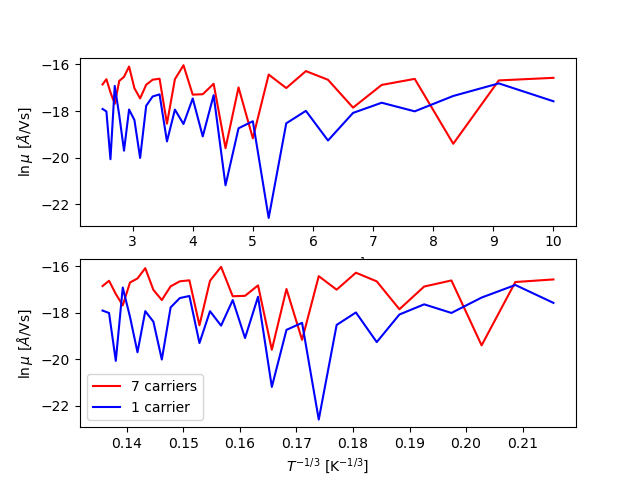

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

ddir = '/Users/nico/Desktop/simulation_outputs/yssmb_hopping/'

dat_7carriers = np.load(ddir + 'mu_v_T_1d_7carriers_uncorr.npy')
dat_1carrier = np.load(ddir + 'mu_v_T_1d_1carrier_uncorr.npy')

T = dat_7carriers[0,:]

v7 = np.abs(dat_7carriers[1,:])
v1 = np.abs(dat_1carrier[1,:])



fig, ax = plt.subplots(2,1)

# Arrhenius plot
ax[0].plot(1000/T, np.log(v7), 'r-',label='7 carriers')
ax[0].plot(1000/T, np.log(v1), 'b-',label='1 carrier')
ax[0].set_xlabel('$1000/T$ [K$^{-1}$]')
ax[0].set_ylabel('$\ln\mu$ [$\AA$/Vs]')

ax[1].plot((1/T)**(1/3), np.log(v7), 'r-', label='7 carriers')
ax[1].plot((1/T)**(1/3), np.log(v1), 'b-', label='1 carrier')
ax[1].set_xlabel('$T^{-1/3}$ [K$^{-1/3}$]')
ax[1].set_ylabel('$\ln\mu$ [$\AA$/Vs]')
plt.legend()
plt.show()

# 2. Results on 1D, correlated energies (YSSMB model)

Same lattice as above except that now energies obey the following distance-decaying correlations:

$$
\langle \varepsilon_i\,\varepsilon_j\rangle = \nu^2 \langle \phi_i\,\phi_j\rangle = \frac{\nu^2k_BT}{4\pi KR_{ij}}\,e^{-\alpha R_{ij}}, \text{with } R_{ij} = |\bm{r}_i - \bm{r}_j|,\,\alpha = \sqrt{s/K}
$$

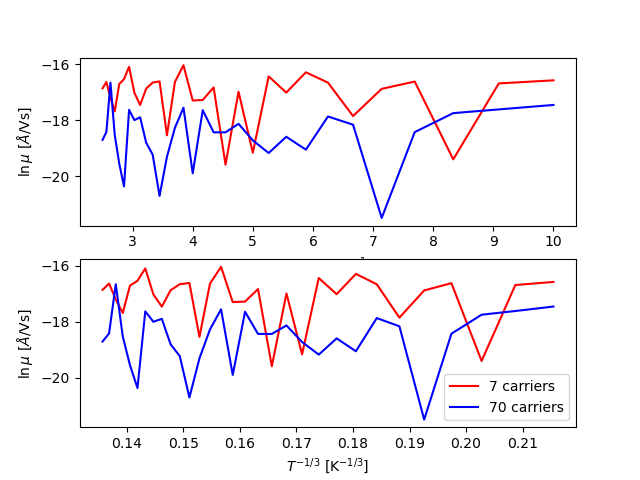

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

ddir = '/Users/nico/Desktop/simulation_outputs/yssmb_hopping/'

dat_7carriers = np.load(ddir + 'mu_v_T_1d_7carriers.npy')
dat_70carriers = np.load(ddir + 'mu_v_T_1d_70carriers.npy')

T = dat_7carriers[0,:]

v7 = np.abs(dat_7carriers[1,:])
v70 = np.abs(dat_70carriers[1,:])



fig, ax = plt.subplots(2,1)

# Arrhenius plot
ax[0].plot(1000/T, np.log(v7), 'r-',label='7 carriers')
ax[0].plot(1000/T, np.log(v70), 'b-',label='70 carriers')
ax[0].set_xlabel('$1000/T$ [K$^{-1}$]')
ax[0].set_ylabel('$\ln\mu$ [$\AA$/Vs]')

ax[1].plot((1/T)**(1/3), np.log(v7), 'r-', label='7 carriers')
ax[1].plot((1/T)**(1/3), np.log(v70), 'b-', label='70 carriers')
ax[1].set_xlabel('$T^{-1/3}$ [K$^{-1/3}$]')
ax[1].set_ylabel('$\ln\mu$ [$\AA$/Vs]')
plt.legend()
plt.show()

## 2. 3D small lattice realisation, with uncorrelated site energies.

These are my results for a single realisation of a $32\times 12\times 12$ lattice ($a = 10\,\text{\AA}$) with a voltage drop of 1V in the $x$-direction.

The site energies are i.i.d. from a Gaussian distribution. In the papers, where they obey the following distance-decaying correlations:

$$
\langle \varepsilon_i\,\varepsilon_j\rangle = \nu^2 \langle \phi_i\,\phi_j\rangle = \frac{\nu^2k_BT}{4\pi KR_{ij}}\,e^{-\alpha R_{ij}}, \text{with } R_{ij} = |\bm{r}_i - \bm{r}_j|,\,\alpha = \sqrt{s/K}
$$

Let's focus on the initial and final occupation probabilities and on the hopping statistics